# Laboratorio 2.1: Clasificación

Bárbara Poblete, Felipe Bravo, Aymé Arango, Alison Fernandez, Mabel Sánchez, Juan Pablo Silva

**Mayo 2020**

## ============= Declaración de compromiso ético =============

Las siguientes personas: Pía Contreras Guerrero, declaran no incurrir en copia, ni compartir respuestas con otras personas. Por lo que, ratifican que las respuestas de la presente actividad son de su propia confección y reflejan su propio conocimiento.

## =========== Contribución de cada integrante del grupo  ==========

Sólo en caso de desarrollar el presente laboratorio en grupo (de máximo dos), especifique la contribución:

::

::

# Instrucciones


1. Trabaje de manera individual o en grupo de 2 personas. Asegúrese de agregar su(s) nombre(s) en la Declaración de compromiso ético y especificar la contribución de cada integrante en caso de trabajar en grupo.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. 

3. Cuando finalice el laboratorio, **genere un archivo HTML** usando jupyter (ver tutorial 2: *Descargar el archivo HTML*) y súbalo a U-Cursos. El laboratorio debe ser entregado por 1 integrante, en caso de trabajar en grupo .

4. Las respuestas a cada pregunta se deben escribir en los bloques que dicen **RESPUESTA A PREGUNTA X.X**.

# Del Laboratorio

En este laboratorio, primero vamos a hacer un análisis de datos y luego vamos a entrenar un clasificador de 3 maneras: 

* Entrenar/testear con los mismos datos,  

* Dividiendo el dataset en una parte para entrenar y otra para testear, y finalmente, 

* Usando cross-validation. Veremos accuracy, precision y recall para luego analizar los resultados. 


# PARTE 1: Explorar un dataset

Usaremos el **Wine Dataset**, que viene en **scikit-learn**. Para ello, ejecutaremos la siguiente línea de código para cargar nuestro dataset.

In [1]:
from sklearn.datasets import load_wine

## PREGUNTA 1.1

Indique lo siguiente:
* Tamaño del dataset (cantidad de instancias y atributos). 
* ¿Cuántas clases son?
* ¿Qué nombre tienen las clases?
* ¿Cuántas instancias hay en cada clase?

Indique en cada caso cómo obtuvo la respuesta, es decir, adjunte código.

### RESPUESTA A PREGUNTA 1.1

El tamaño del dataset son 178 instancias y 13 atributos.

Son 3 clases y sus nombres son class_0, class_1 y class_2.

Existen 50 instancias para cada clase

In [19]:
####### Respuesta #######
import pandas as pd

wine=load_wine()

print(wine.DESCR)

print(wine.target_names)  

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## PREGUNTA 1.2

Explique:
- ¿Qué hacen las siguientes líneas de código?
- ¿Qué nos muestra este gráfico? 
- ¿Cuáles son las principales observaciones que puede obtener sobre los datos a partir de los gráficos?

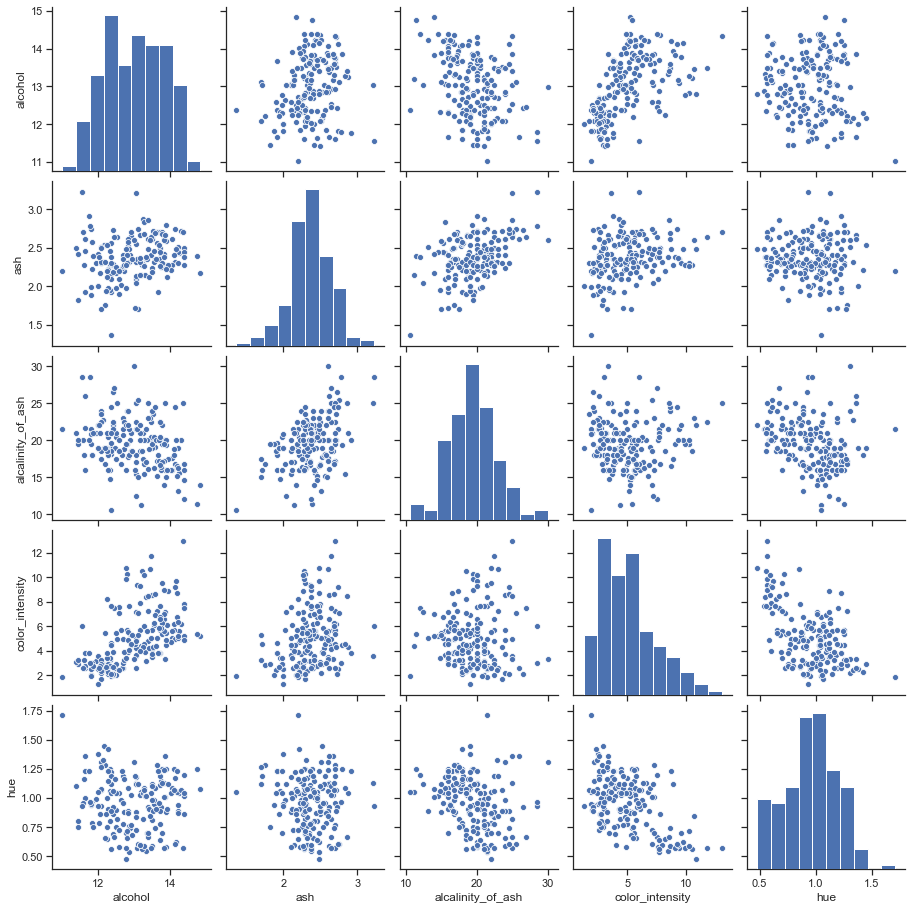

In [20]:
## EJECUTAR ESTE BLOQUE

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd

wine = load_wine()
data = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

data['target'] = wine['target']
data['class'] = data['target'].map(lambda ind: wine['target_names'][ind])

g = sns.pairplot(data.iloc[:, [0,2,3,9,10]]) # Parametro kind="reg" agrega una recta
plt.show()

### RESPUESTA A PREGUNTA 1.2

::

Las siguientes líneas de código importan librerías que permiten graficar, luego se carga el dataset en un dataframe usando la librería pandas.

Se impone que la columna target del dataset data sea igual a la columna target del dataset wine y grafica.

Se grafica algunos atributos de acuerdo a otros atributos. Cuando se grafica el atributo respecto al mismo atributo hay un gráfico de barras.


Las principales observaciones que se pueden hacer son que existe relación entre atributos por ejemplo, existe relación de alcohol v/s hue y color intensity y alcalinity of ash y ash, y así con cada atributo en los gráficos. Es decir, existe relación entre todos ellos.

Se ven gráficos que presentan relación de datos que están más juntos o datos relaciones donde sus datos se encuentran más separados, por ejemplo el gráfico ash v/s alcalinity of ash tiene sus datos muy juntos en el centro del gráfico, mientras que el gráfico hue v/s alcohol tiene sus datos un poco más separados en el gráficos. Cabe destacar también que para cada gráfico el eje x contiene distintos rangos de números.

::

# PARTE 2: Entrenar/testear

En esta parte useremos el clasificador **Decision Tree**. Veremos distintas formas de usarlo, y vamos a compararlas utilizando diversas métricas. 

## PREGUNTA 2.1

Usando el siguiente código, complete lo que falta para cargar los datos, entrenar y hacer una predicción empleando el clasificador. Luego, muestre las métricas de **accuracy**, **precision**, **recall** y **f1-score**.

In [21]:
## RESPUESTA PREGUNTA 2.1

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier()

X = wine.data      ## datos, caracteristicas o features 
y = wine.target    ## clase para cada instancia anterior

# .... COMPLETE ACA
clf.fit(X, y)  
y_pred = clf.predict(X)   ## predecir 'y' usando la matriz 'X', los resultados (clases predecidas) quedan en y_pred 
print("Accuracy:", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



## PREGUNTA 2.2

Explique cada una de las líneas de código de la pregunta 2.1 (omita las líneas que cargan librerías).

### RESPUESTA A PREGUNTA 2.2
::

clf es usar un arbol de decisión para entrenar nuestro primer clasificador con el dataset cargado.

X son los datos, características o features de cada vino.

y es la clase para cada instancia anterior.

clf.fit(X,y) entrenar usando X (características) e y (clase)

y_pred es predecir "y" (clase) usando la matriz "X", los resultados de ésta predicción quedan guardados en y_pred.

Accuracy se obtiene con el comando accuracy_score que toma como parámetros y e y_pred.

Y finalmente, se obtiene un reporte de clasificacion, donde se indican las métricas precision, recall, f1-score y support a partir del comando classification_report que toma como parámetro y e y_pred.

::

## PREGUNTA 2.3

De acuerdo a las métricas obtenidas: 

1. ¿Qué opina sobre las predicciones? 
2. ¿Recomendaría utilizar este clasificador en una aplicacion para clasificar vinos? ¿Por qué?
2. ¿Qué problema puede identificar?

### RESPUESTA A PREGUNTA 2.3
::

Las métricas entregadas son perfectas, ya que todos los valores son igual a 1.0, lo cual es lo esperado.

Recomendaría este clasificador, puesto que entrega todas la métricas en su mejor valor posible.

Sin embargo, el problema que se puede presentar es que no es del todo realista pues es muy dificil que exista un modelo predictivo que entregue todos sus valores en el óptimo.

::

# PARTE 3: Dividiendo el dataset para entrenar y testear

Ahora lo que haremos será dividir nuestro dataset en 70% entrenar (***training set***) y 30% para testear (***testing set***). Use la función ***train_test_split()*** de *sklearn* y utilice las variables `X_train, X_test, y_train, y_test`.

## PREGUNTA 3.1

Escriba el código necesario para entrenar el modelo e indique el **accuracy**, **precision** y **recall** del clasificador. 
Entrene usando el ***training set*** y pruebe sobre el ***testing set***, en base a la división 70%-30%, respectivamente 

**NOTA: para dividir el dataset use el parámetro `stratify=y`.**

In [32]:
### RESPUESTA A PREGUNTA 3.1
# Recuerde usar las variables X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=37, stratify=y)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)    ## Entrenamos con X_train y clases y_train

y_pred = clf.predict(X_test)   ## Predecimos con nuevos datos (los de test X_test)
print("Accuracy en test set:", accuracy_score(y_test, y_pred))   ## Evaluamos la predicción comparando y_test con y_pred
print(classification_report(y_test, y_pred))

Accuracy en test set: 0.9074074074074074
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.86      0.90      0.88        21
           2       1.00      0.87      0.93        15

    accuracy                           0.91        54
   macro avg       0.92      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



## PREGUNTA 3.2

Según el resultado obtenido en la pregunta anterior, responda lo siguiente:

1. ¿Cuál clasificador tiene peores resultados? ¿Por qué?
2. ¿Considera este clasificador mejor o peor que el anterior? ¿Por qué? (pregunta sobre el modelo, no sobre el método)
3. ¿En qué situaciones utilizaría este clasificador en vez del anterior?
4. ¿Cuál de las dos formas de entrenar el clasificador prefiere? 

### RESPUESTA A PREGUNTA 3.2

::

El clasificador que tiene peores resultados es el segundo ya que tiene un accuracy más bajo (0.90<1).

El primer clasificador es mejor que el anterior si lo que se espera obtener es 100% de métricas y predicciones en resultados perfectos, sin embargo si lo que se quiere es asegurar una generalización, es decir, generar predicciones correctas en distintos datos a los datos de entrenamiento, el segundo clasificador es mejor, ya que no sólo predice en un buen porcentaje (90%), si no que también, logra construir un modelo predictivo que generaliza, porque hacer predicciones correctas sobre los datos de entrenamiento no de suficiente para determinar la capacidad predictiva.

Utilizaría el segundo clasificador por sobre el anterior cuando necesito asegurar que el modelo debe generalizar.

El clasificador prefiere la segunda forma ya que existen datos de entrenamiento y datos de prueba.

::

## PREGUNTA 3.3

El siguiente código genera una matriz de confusión de los resultados de clasificación de la pregunta 3.1. Ejecute el bloque completo para visualizar el gráfico. Interprete la matriz y comente sobre cada uno de los valores distintos de 0 en la matriz y describa lo que representa.

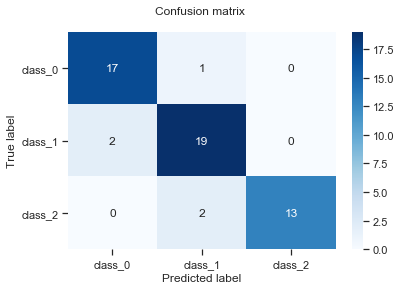

In [26]:
## EJECUTAR ESTE BLOQUE

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, y_pred) 

# Only use the labels that appear in the data
classes = wine.target_names[unique_labels(y_test, y_pred)]

df = pd.DataFrame(cm, index = classes, columns = classes)

g = sns.heatmap(df, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)

plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()

### RESPUESTA A PREGUNTA 3.3
::

Esta matriz tiene que ver con que un tipo de error es mucho peor que otros tipos de errores.

La diagonal representa los verdaderos positivos, es decir, cuando clasifiqué de buena manera. Se puede observar que la mayoría de datos se representaron de buena manera.

En el número 1 de la segunda columna (y primera fila) se puede ver que la un dato de la clase class_0 se clasificó como class_1.

En la segunda fila, y primera columna, existe dos datos que su verdadera clase era class_1 y fue clasificada como class_0.

Finalmente, en la tercera fila y segunda columna se puede ver que existen dos datos de la clase class_2 fueron clasificadas como class_1.

::

# PARTE 4: Cross-validation

Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation.

El código que está a continuación realizará 10-fold cross-validation usando Decision Tree sobre los datos. La forma de estimar el rendimiento del clasificador es, entre otras cosas, calculando el promedio de todos los k-folds.

Además se muestra la predición sobre los datos para testear. 

In [31]:
## EJECUTAR ESTE BLOQUE

from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(clf, X, y, cv = 10, scoring = scoring, return_train_score= True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

#Si quisieramos mostrar el resultado de cada k-fold, deberiamos quitar la 
#funcion np.mean para calcular el promedio. Esto mostraría una lista con el resultado de cada fold


Promedio Precision: 0.9072883597883598
Promedio Recall: 0.8877777777777778
Promedio F1-score: 0.8821063250475017
Promedio Accucary: 0.8816993464052288


## PREGUNTA 4.1

- ¿Qué indican los resultados obtenidos? 

- Compare los valores de las métricas con respecto a lo obtenido en la pregunta 3.1 y comente en qué difieren y por qué.

- ¿Qué beneficios tiene emplear cross-validation?

### RESPUESTA A PREGUNTA 4.1

::

Los valores obtenidos nos indica el promedio de las distintas métricas utilizando el clasificador cross-validation. Las métricas son precisión, recall, F1-score y accuracy.

Comparando con la pregunta 3.1 las métricas son muy parecidas, sin embargo, con el clasificador de la pregunta 3.1 se obtienen resultados con métricas un poco más altas. Difieren principalmente por que son diferentes clasificadores (con distintos algoritmos), entrenan los datos de manera distinta, ocupan distintos datos de entrenamiento y luego distintos datos de testeo.

Cross -validation se utiliza mayormente en entornos donde el objetivo principal es la predicción y se quiere estimar la precisión de un modelo que se llevará a cabo a la práctica. Es una técnica muy utilizada en proyecto de inteligencia artificial para validar modelos generador. La técnica de éste clasificador es particionar el dataset en k conjuntos disconjuntos, y para cada partición se debe juntar las k-1 particiones restantes y entrenar el módulo sobre esos datos y evaluar el modelo en la partición i.

::

# PARTE 5: FINAL

## PREGUNTA 5.1

Respecto a los 3 tipos de experimentos (1. entrenando y testeando con los mismos datos, 2. dividiendo el dataset en train y test, y 3. usando Cross-validation):

- ¿Cuál considera que es el mejor? Justifique el por qué de su respuesta haciendo referencia al tamaño del dataset, distribución de clases, casos de overfitting, entre otras cosas.

- ¿Cuál considera que es el peor y por qué no debería utilizarse?

### RESPUESTA A PREGUNTA 5.1
::

Considero que es mejor cross-validation, los dos modelos anteriores tienen limitaciones como que las evaluaciones pueden variar mucho según las particiones escogidas o si el training es muy pequeño el modelo será sesgado, o si el testing es muy pequeño, la métrica de accuracy será poco confiable, por otra parte también está la limitación de que algunos datos nunca se usen para entrenar o que algunos datos nunca se usen para evaluar.

Yo creo que el peor es el tipo de clasificador que entrena y testea con los mismos datos, ya que lo único que aprenderá será los datos entrenados y con lo único que podrá clasificar serán con los datos de entrenamiento, por lo que siempre la clasificación no será confiable, por ejemplo para otros modelos, sólo servirá con el modelo que se entrenará y testeará.

::


## PREGUNTA 5.2

Entrene un clasificador empleando k-nearest neighbors (**KNN**) considerando 15 vecinos y cross validation de 10 folds. 

Compare el resultado de cross validation obtenido usando Decision Tree y KNN. ¿Hay algún efecto notorio en cuanto al desempeño de ambos clasificadores? ¿Se podría decir que uno es mejor que otro? Explique.

### RESPUESTA A PREGUNTA 5.2 (CÓDIGO)

In [38]:
# Para cargar KNN
from sklearn.neighbors import KNeighborsClassifier

K = 15 # numero de vecinos
knn = KNeighborsClassifier(n_neighbors=K)  

## AGREGUE CODIGO PREGUNTA 5.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=37, stratify=y)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy en test set:", accuracy_score(y_test, y_pred))   ## Evaluamos la predicción comparando y_test con y_pred
print(classification_report(y_test, y_pred))



Accuracy en test set: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.83      0.48      0.61        21
           2       0.48      0.73      0.58        15

    accuracy                           0.67        54
   macro avg       0.70      0.68      0.67        54
weighted avg       0.72      0.67      0.67        54



### RESPUESTA A PREGUNTA 5.2 (EXPLICACIÓN)

::

El clasificador de cross-validation de 10 folds está implementado en el código anterior, pregunta 4.1.

Los valores de las métricas son distintos, de hecho en el clasificador knn, todas las métricas tienen valores significativamente menores en relación al clasificador DecisionTree.

En este caso funciona mejor el árbol de decisión, ya que se obtienen mejores valores en accuracy, precision, recall, f1-score y support.

Es dificil decir que uno es mejor que otro, puesto que ambos tienen ventajas y desventajas. Por ejemplo, la gran ventaja de los árboles de decisiones es la interpretabilidad, además de poder precedir probabilidades usando las frecuencias relativas de las clases en la hoja, y por último, se puede exigir un mínimo de instancias en la hoja para evitar sobreajuste, además, el árbol puede ser podado.

Por otro lado, el clasificador KNN, no construye modelos explícitos, por lo que es más flexible en general, es independiente del número de clases, sin embargo la clasificación es más costosa y también tiene la maldición de la dimensionalidad (para mucha cantidad de datos puede equivocarse más fácilmente).

::


## PREGUNTA 5.3

Un consultor en minería de datos tiene la siguiente estrategia al momento de enfrentar un problema de clasificación: probar todos los modelos posibles hasta encontrar uno que tenga cero error de entrenamiento. Comente la estrategia del consultor y proponga una estrategia alternativa.

### RESPUESTA A PREGUNTA 5.3

::

Encontrar un error cero de entrenamiento, se puede lograr con un clasificador que entrene y testee con los mismos datos, sin embargo, ésto funcionaría de manera deseada, sólo con el dataset elegido, no se podría implementar en otros dataset, ya que los datos entrenados y testeados pueden no estar buenos de acuerdo a otro dataset.

La estrategia que propondría es utilizar cross-validation, que si bien, no tendrá sus modelos en cero error de entrenamiento, podrá entrenar el modelo tantas veces hasta tener un mínimo de error, teniendo en consideración que el error total se calcula sumando los errores hechos en cada fold de testing.
::

## PREGUNTA 5.4

El mismo consultor siempre usa la misma métrica para evaluar un modelo: accuracy. Comente la estrategia del consultor y proponga una estrategia alternativa.

### RESPUESTA A PREGUNTA 5.4

::

Accuracy no es una buena métrica cuando se tiene clases desbalanceadas. 

Una estrategia alternativa sería utilizar también las métricas precision (% de casos seleccionados que son correctos), recall (% de los casos positivos que son seleccionados) y f-measure (combina precision y recall). 

::